# Importing libraries and reading the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.simplefilter(action='ignore')

In [2]:
data = pd.read_csv(r"/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Removing Outliers from charges column

In [6]:
data['charges'].median()

9333.014350000001

In [7]:
data['charges'].mean()

13261.369959046897

In [8]:
data=data[np.abs(stats.zscore(data['charges'])) < 3]

In [9]:
data.describe()

,age,bmi,children,charges
count,2758.000000,2758.000000,2758.000000,2758.000000
mean,39.088470,30.672219,1.103698,13035.810151
std,14.089233,6.120764,1.215357,11757.338984
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4676.641325
50%,39.000000,30.400000,1.000000,9288.026700
75%,51.000000,34.752500,2.000000,16281.596250
max,64.000000,53.130000,5.000000,49577.662400


# Visualizing the data columns

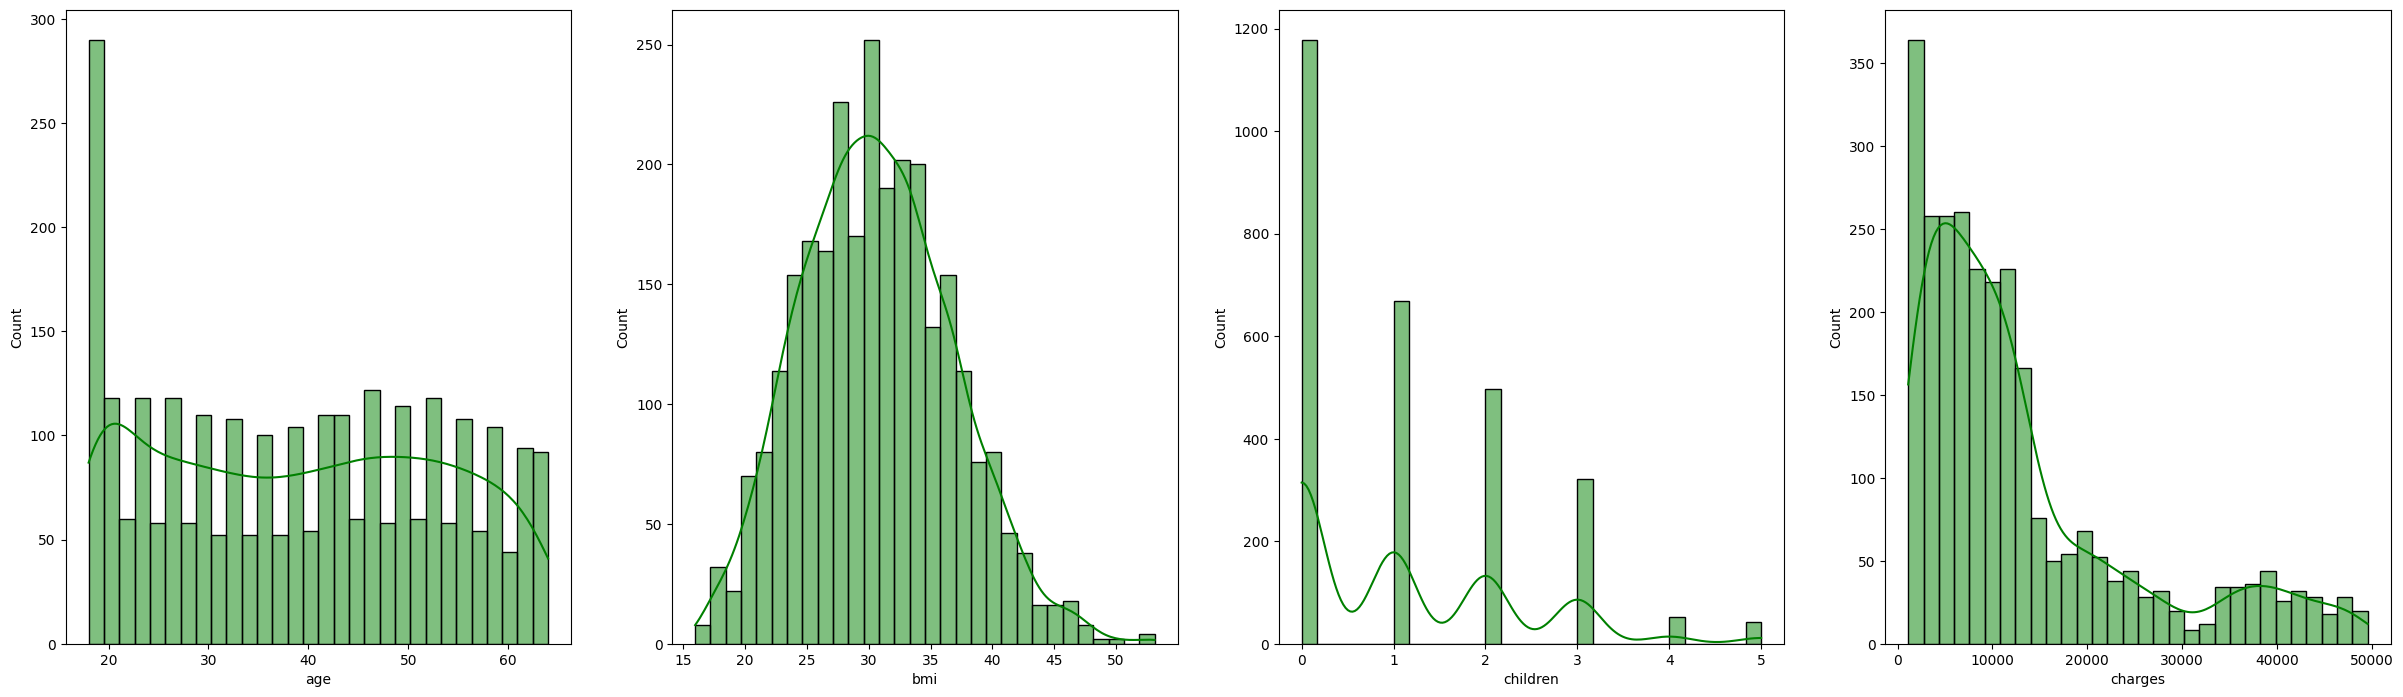

In [37]:
plt.figure(figsize=(30,28))
for i, col in enumerate( ['age','bmi','children','charges']):
    plt.subplot(3, 4, i+1)
    sns.histplot(data = data,
            x = col,
            kde = True,
            bins = 30,
            color = 'green')

plt.show()

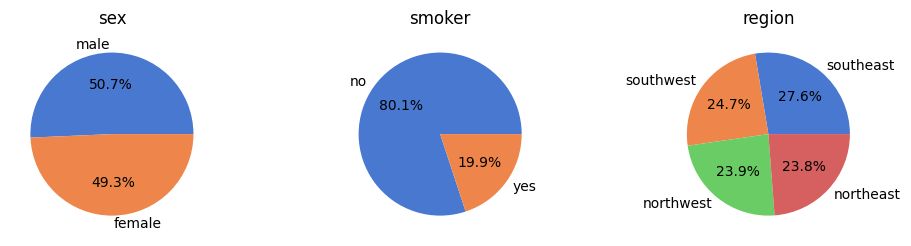

In [38]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['sex','smoker','region']):
    plt.subplot(3,3,i+1)
    x=data[col].value_counts().reset_index()
    plt.title(col)
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%",colors=sns.color_palette('muted'))

# Analyzing the data

In [12]:
data_corr= data.copy()
label_encoder = LabelEncoder()
for col in ['sex','smoker','region']:
    data_corr[col] = label_encoder.fit_transform(data_corr[col])
data_corr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
data_corr = data_corr.corr()

<Axes: >

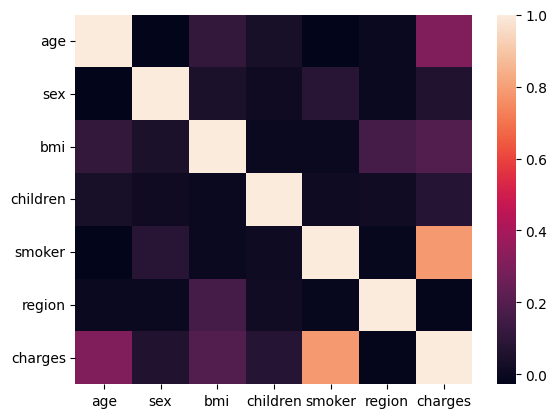

In [39]:
sns.heatmap(data=data_corr,annot=False)

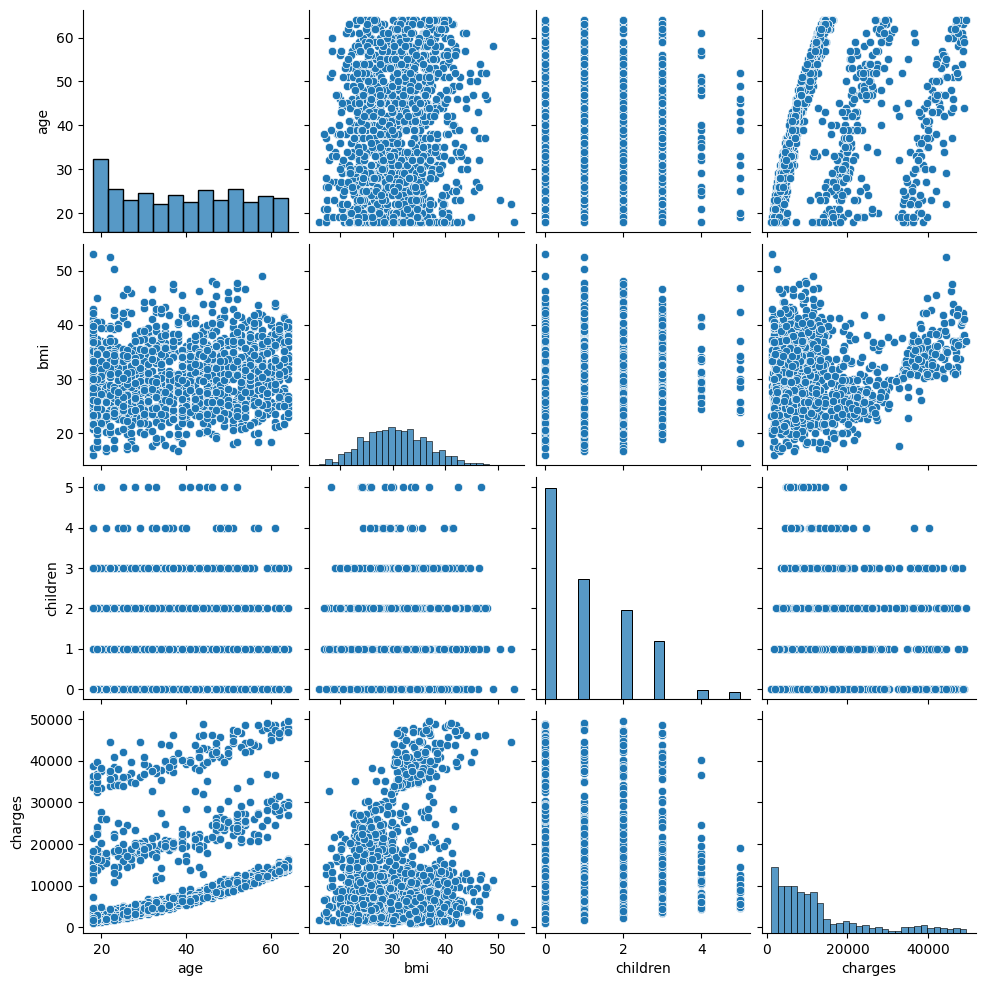

In [15]:
sns.pairplot(data=data)
plt.show()

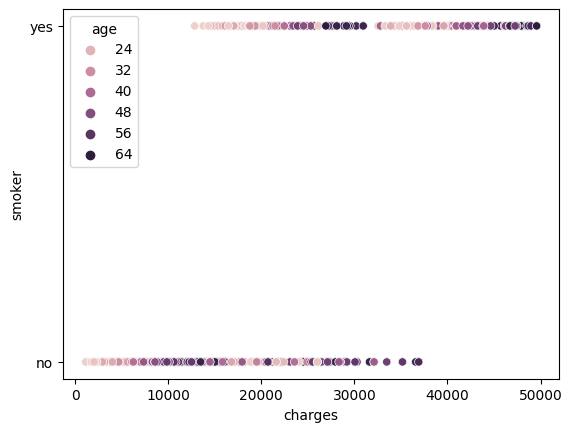

In [16]:
sns.scatterplot(data=data,x=data.charges,y=data.smoker,hue=data.age)
plt.show()

In [17]:
data.groupby('sex')['charges'].median()

sex
female    9257.14610
male      9301.89355
Name: charges, dtype: float64

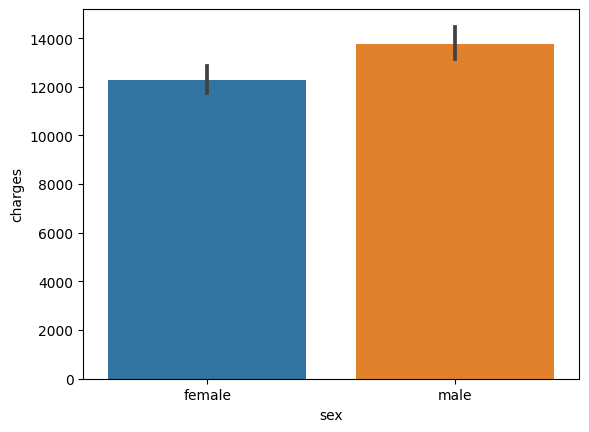

In [18]:
sns.barplot(data=data,x=data.sex,y=data.charges,estimator=np.mean)
plt.show()

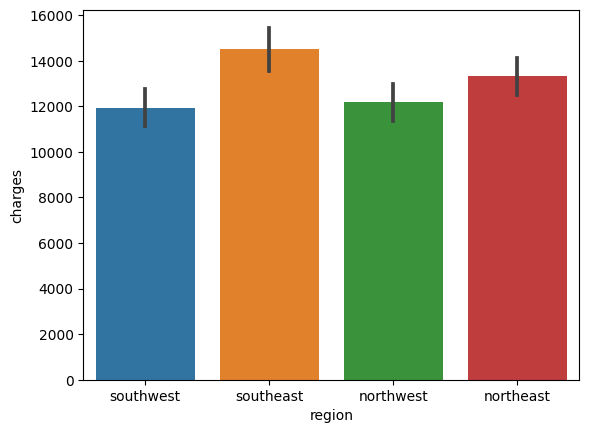

In [19]:
sns.barplot(data=data,x=data.region,y=data.charges,estimator=np.mean)
plt.show()

# Splitting the data and getting dummies

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split

In [21]:
dum = pd.get_dummies(data[['sex','region','smoker']],dtype=int)

In [22]:
dum.head()

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,1,0,0,0,0,1,0,1
1,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,1,0
3,0,1,0,1,0,0,1,0
4,0,1,0,1,0,0,1,0


In [23]:
data_model = pd.concat([data[['age','bmi','children','charges']],dum],axis=1)

In [24]:
X=data_model.drop(columns=['charges'])
y=data_model["charges"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=7)

# Training data using Linear regression and evaluating 

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.score(X_test,y_test)

0.7795213236264347

In [29]:
model.score(X_train,y_train)

0.74249425622043

# Training data using Random Forest Regressor and evaluating

In [30]:
model_rfr = RFR()

In [31]:
model_rfr.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
model_rfr.score(X_test,y_test)

0.9523594769212101

In [33]:
model_rfr.score(X_train,y_train)

0.9909293524938324